In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from test_data.svl_mock_data import svl

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

pd.options.display.float_format = '{:,}'.format


In [2]:
svl['days_on_zillow'] = svl['time_on_zillow'].str.extract('([0-9]+)')
svl['liked'] = ((svl['page_view_count'] /svl['favorite_count']) * 100) / svl['days_on_zillow'].astype("int64")
svl['20_down'] = svl['price'] * .20
svl['3.5_down'] = svl['price'] * .035
svl['zest_difference'] = svl['price'] - svl['zestimate']

In [9]:

svl.round(2)

,address,price,property_tax_rate,time_on_zillow,zestimate,rent_zestimate,lot_size,annual_homeowners_insurance,beds,baths,...,year_built,page_view_count,favorite_count,home_status,monthly_hoa_fee,days_on_zillow,liked,20_down,3.5_down,zest_difference
zpid,,,,,,,,,,,,,,,,,,,,,
17481836,17985 Vista Point Dr,429000,1.2,19 days,426600,2385,7581,9999,3,2,...,1984,1826,70,FOR_SALE,138,19,137.29,"85,800.0","15,015.0",2400
17481793,13330 Alta Vista Dr,409500,1.2,20 days,411800,2100,7200,9999,3,2,...,1983,1084,34,FOR_SALE,138,20,159.41,"81,900.0","14,332.5",-2300
17482827,18465 Mountain Meadows Dr,410000,1.2,18 days,409600,2214,7200,9999,3,2,...,1980,1904,60,FOR_SALE,115,18,176.3,"82,000.0","14,350.0",400
17481334,13125 Riverview Dr,459900,1.2,6 days,<NA>,9999,7300,9999,3,2,...,1986,226,11,FOR_SALE,115,6,342.42,"91,980.0","16,096.5",<NA>


In [4]:
svl.describe().round(2)

,price,property_tax_rate,rent_zestimate,lot_size,annual_homeowners_insurance,beds,baths,living_area_value,year_built,page_view_count,favorite_count,monthly_hoa_fee,liked,20_down,3.5_down
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,"427,100.0",1.2,"4,174.5","7,320.25","9,999.0",3.0,2.0,"1,766.5","1,983.25","1,260.0",43.75,126.5,203.86,"85,420.0","14,948.5"
std,"23,675.73",0.0,"3,884.77",180.11,0.0,0.0,0.0,166.06,2.5,782.14,26.59,13.28,93.75,"4,735.15",828.65
min,"409,500.0",1.2,"2,100.0","7,200.0","9,999.0",3.0,2.0,"1,584.0","1,980.0",226.0,11.0,115.0,137.29,"81,900.0","14,332.5"
25%,"409,875.0",1.2,"2,185.5","7,200.0","9,999.0",3.0,2.0,"1,678.5","1,982.25",869.5,28.25,115.0,153.88,"81,975.0","14,345.63"
50%,"419,500.0",1.2,"2,299.5","7,250.0","9,999.0",3.0,2.0,"1,751.0","1,983.5","1,455.0",47.0,126.5,167.85,"83,900.0","14,682.5"
75%,"436,725.0",1.2,"4,288.5","7,370.25","9,999.0",3.0,2.0,"1,839.0","1,984.5","1,845.5",62.5,138.0,217.83,"87,345.0","15,285.38"
max,"459,900.0",1.2,"9,999.0","7,581.0","9,999.0",3.0,2.0,"1,980.0","1,986.0","1,904.0",70.0,138.0,342.42,"91,980.0","16,096.5"


## Price to Lot Size

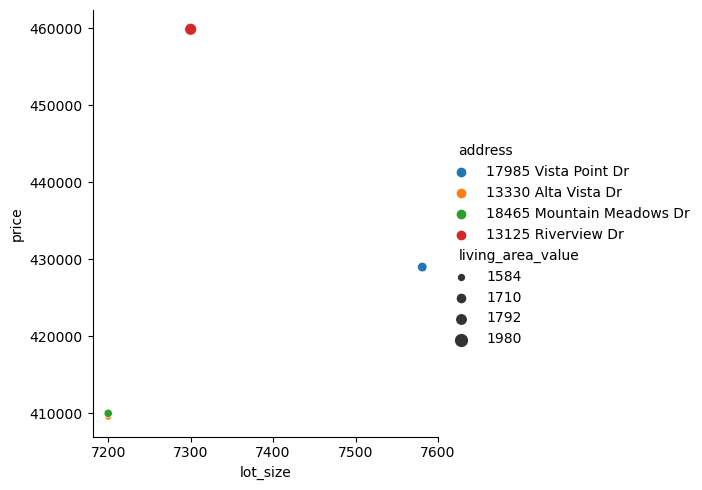

In [5]:
sns.relplot(data=svl, x='lot_size', y='price', hue='address', size='living_area_value')
plt.show()

## Price to Living Space

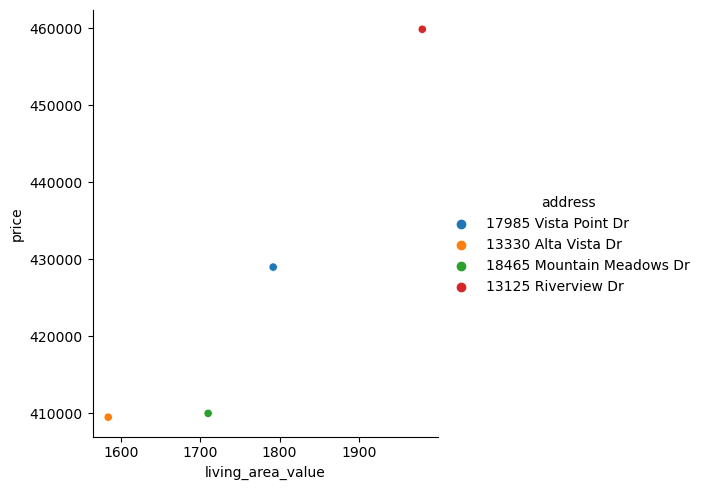

In [6]:
sns.relplot(data=svl, x='living_area_value', y='price', hue='address')
plt.show()

## Price to Year Built

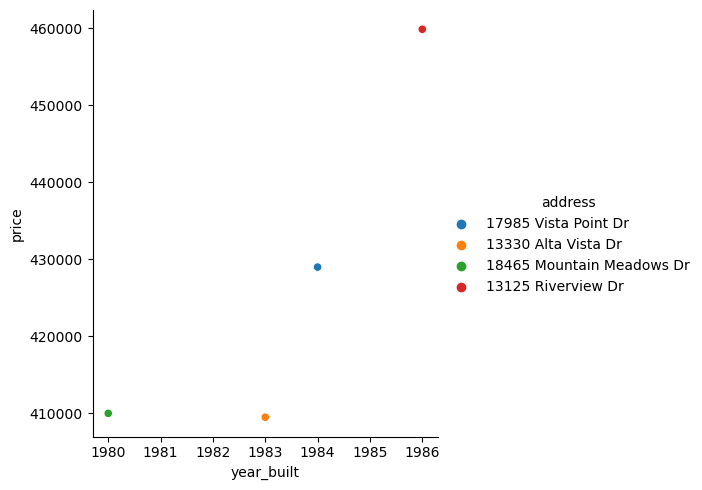

In [7]:
sns.relplot(data=svl, x='year_built', y='price', hue='address')
plt.show()

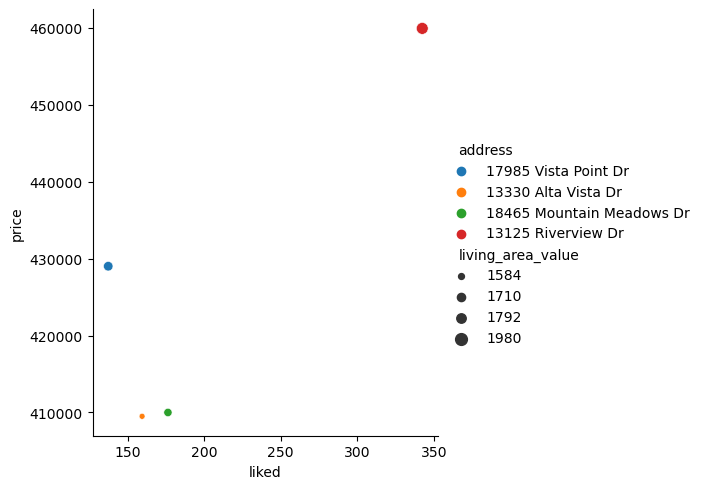

In [8]:
sns.relplot(data=svl, x='liked', y='price', hue='address', size='living_area_value')
plt.show()
